In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ckdisease/kidney_disease.csv


In [4]:
pip install lux-api # Lux is a powerful Python library for data visualization and exploration, built on top of Pandas. 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 49.0 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for lux-api: filename=lux_api-0.5.1-py3-none-any.whl size=185603 sha256=e6d2d7a8e0f9472acdc5e4491ec7d108c58de02531a9b02bec0dd04bd9d313a0
  Stored in directory: /root/.cache/pip/wheels/29/2f/f5/d5fcd3111309d380314ce9ad7ed6eb2fe03b3315123bd0c2e9
  Created wheel for lux-widget: filename=lux_widget-0.1.11-py3-none-any.whl size=2540461 sha256=69078053b797065d6ddc999b0624da917e151e51f744a8647061e59b8c50f820
  Stored in directory: /root/.cache/pip/wheels/4d/f6/ce/bbd6194f5f69bc0b86bc7b278c766caf129cce86c016191905
Successfully built lux-api lux-widget
Note: you may need to restart the kernel to use updated packages.


In [5]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import os, sys  # Operating system ke sath refernce
import lux  # used for visualization instantly without wring much of the code
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns #for visualization
sns.set()

In [6]:
df=pd.read_csv("/kaggle/input/ckdisease/kidney_disease.csv")
df.head(5)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
df.shape

(400, 26)

In [8]:
#find null values
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [9]:
#Imputing null values-Replace with some other value
def impute_with_mode(df):
    return df.apply(lambda column: column.fillna(column.mode()[0]), axis=0)

# Applying the function to fill null values with mode for each column
df_imputed = impute_with_mode(df)

In [10]:
df_imputed

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
#find unique values in the column

#for i in df_imputed.columns:
    
    
for i in df_imputed.columns:
    #unique_values = df_imputed[column].unique_values
    print("**********************************",i,"******************************")
    print()
    print(set(df_imputed[i].tolist()))
    print()
    

********************************** id ******************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,

In [12]:
#print mode values for the numerical columns with ascii char values
print(df_imputed['rc'].mode())
print(df_imputed['wc'].mode())
print(df_imputed['pcv'].mode())

0    5.2
Name: rc, dtype: object
0    9800
Name: wc, dtype: object
0    41
Name: pcv, dtype: object


In [13]:
#replace mistaken values with actual values

df_imputed['classification']=df_imputed['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)

df_imputed['cad']=df_imputed['cad'].apply(lambda x:'no' if x=='\tno' else x)

df_imputed['dm']=df_imputed['dm'].apply(lambda x:'no' if x=='\tno' else x)
df_imputed['dm']=df_imputed['dm'].apply(lambda x:'yes' if x=='\tyes' else x)
df_imputed['dm']=df_imputed['dm'].apply(lambda x:'yes' if x==' yes' else x)

df_imputed['rc']=df_imputed['rc'].apply(lambda x:'5.2' if x=='\t?' else x)

df_imputed['wc']=df_imputed['wc'].apply(lambda x:'9800' if x=='\t8400' else x)
df_imputed['wc']=df_imputed['wc'].apply(lambda x:'9800' if x=='\t6200' else x)
df_imputed['wc']=df_imputed['wc'].apply(lambda x:'9800' if x=='\t?' else x)

df_imputed['pcv']=df_imputed['pcv'].apply(lambda x:'41' if x=='\t?' else x)
df_imputed['pcv']=df_imputed['pcv'].apply(lambda x:'41' if x=='\t43' else x)



In [14]:
for i in df_imputed.columns:
    print("**********************************",i,"******************************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

********************************** id ******************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,

Axes(0.125,0.11;0.775x0.77)


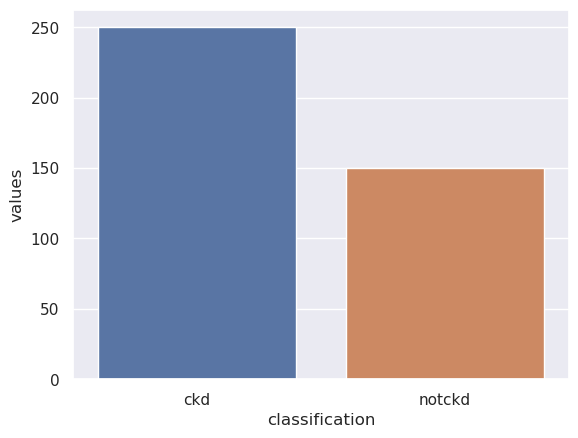

In [15]:
#check label imbalance -Binary classification task
#Label imbalance occurs when the number of data points in each class is
#not roughly equal, leading to a significant difference in class frequencies.

import matplotlib.pyplot as plt
import seaborn as sns

temp = df_imputed['classification'].value_counts()
temp_df = pd.DataFrame({'classification': temp.index, 'values': temp.values})
print(sns.barplot(x='classification', y='values', data=temp_df))

In [16]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [17]:
df_imputed.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [18]:
#converting int type to float
df_imputed['id']=df_imputed['id'].apply(lambda x:float(x))

In [19]:
df_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


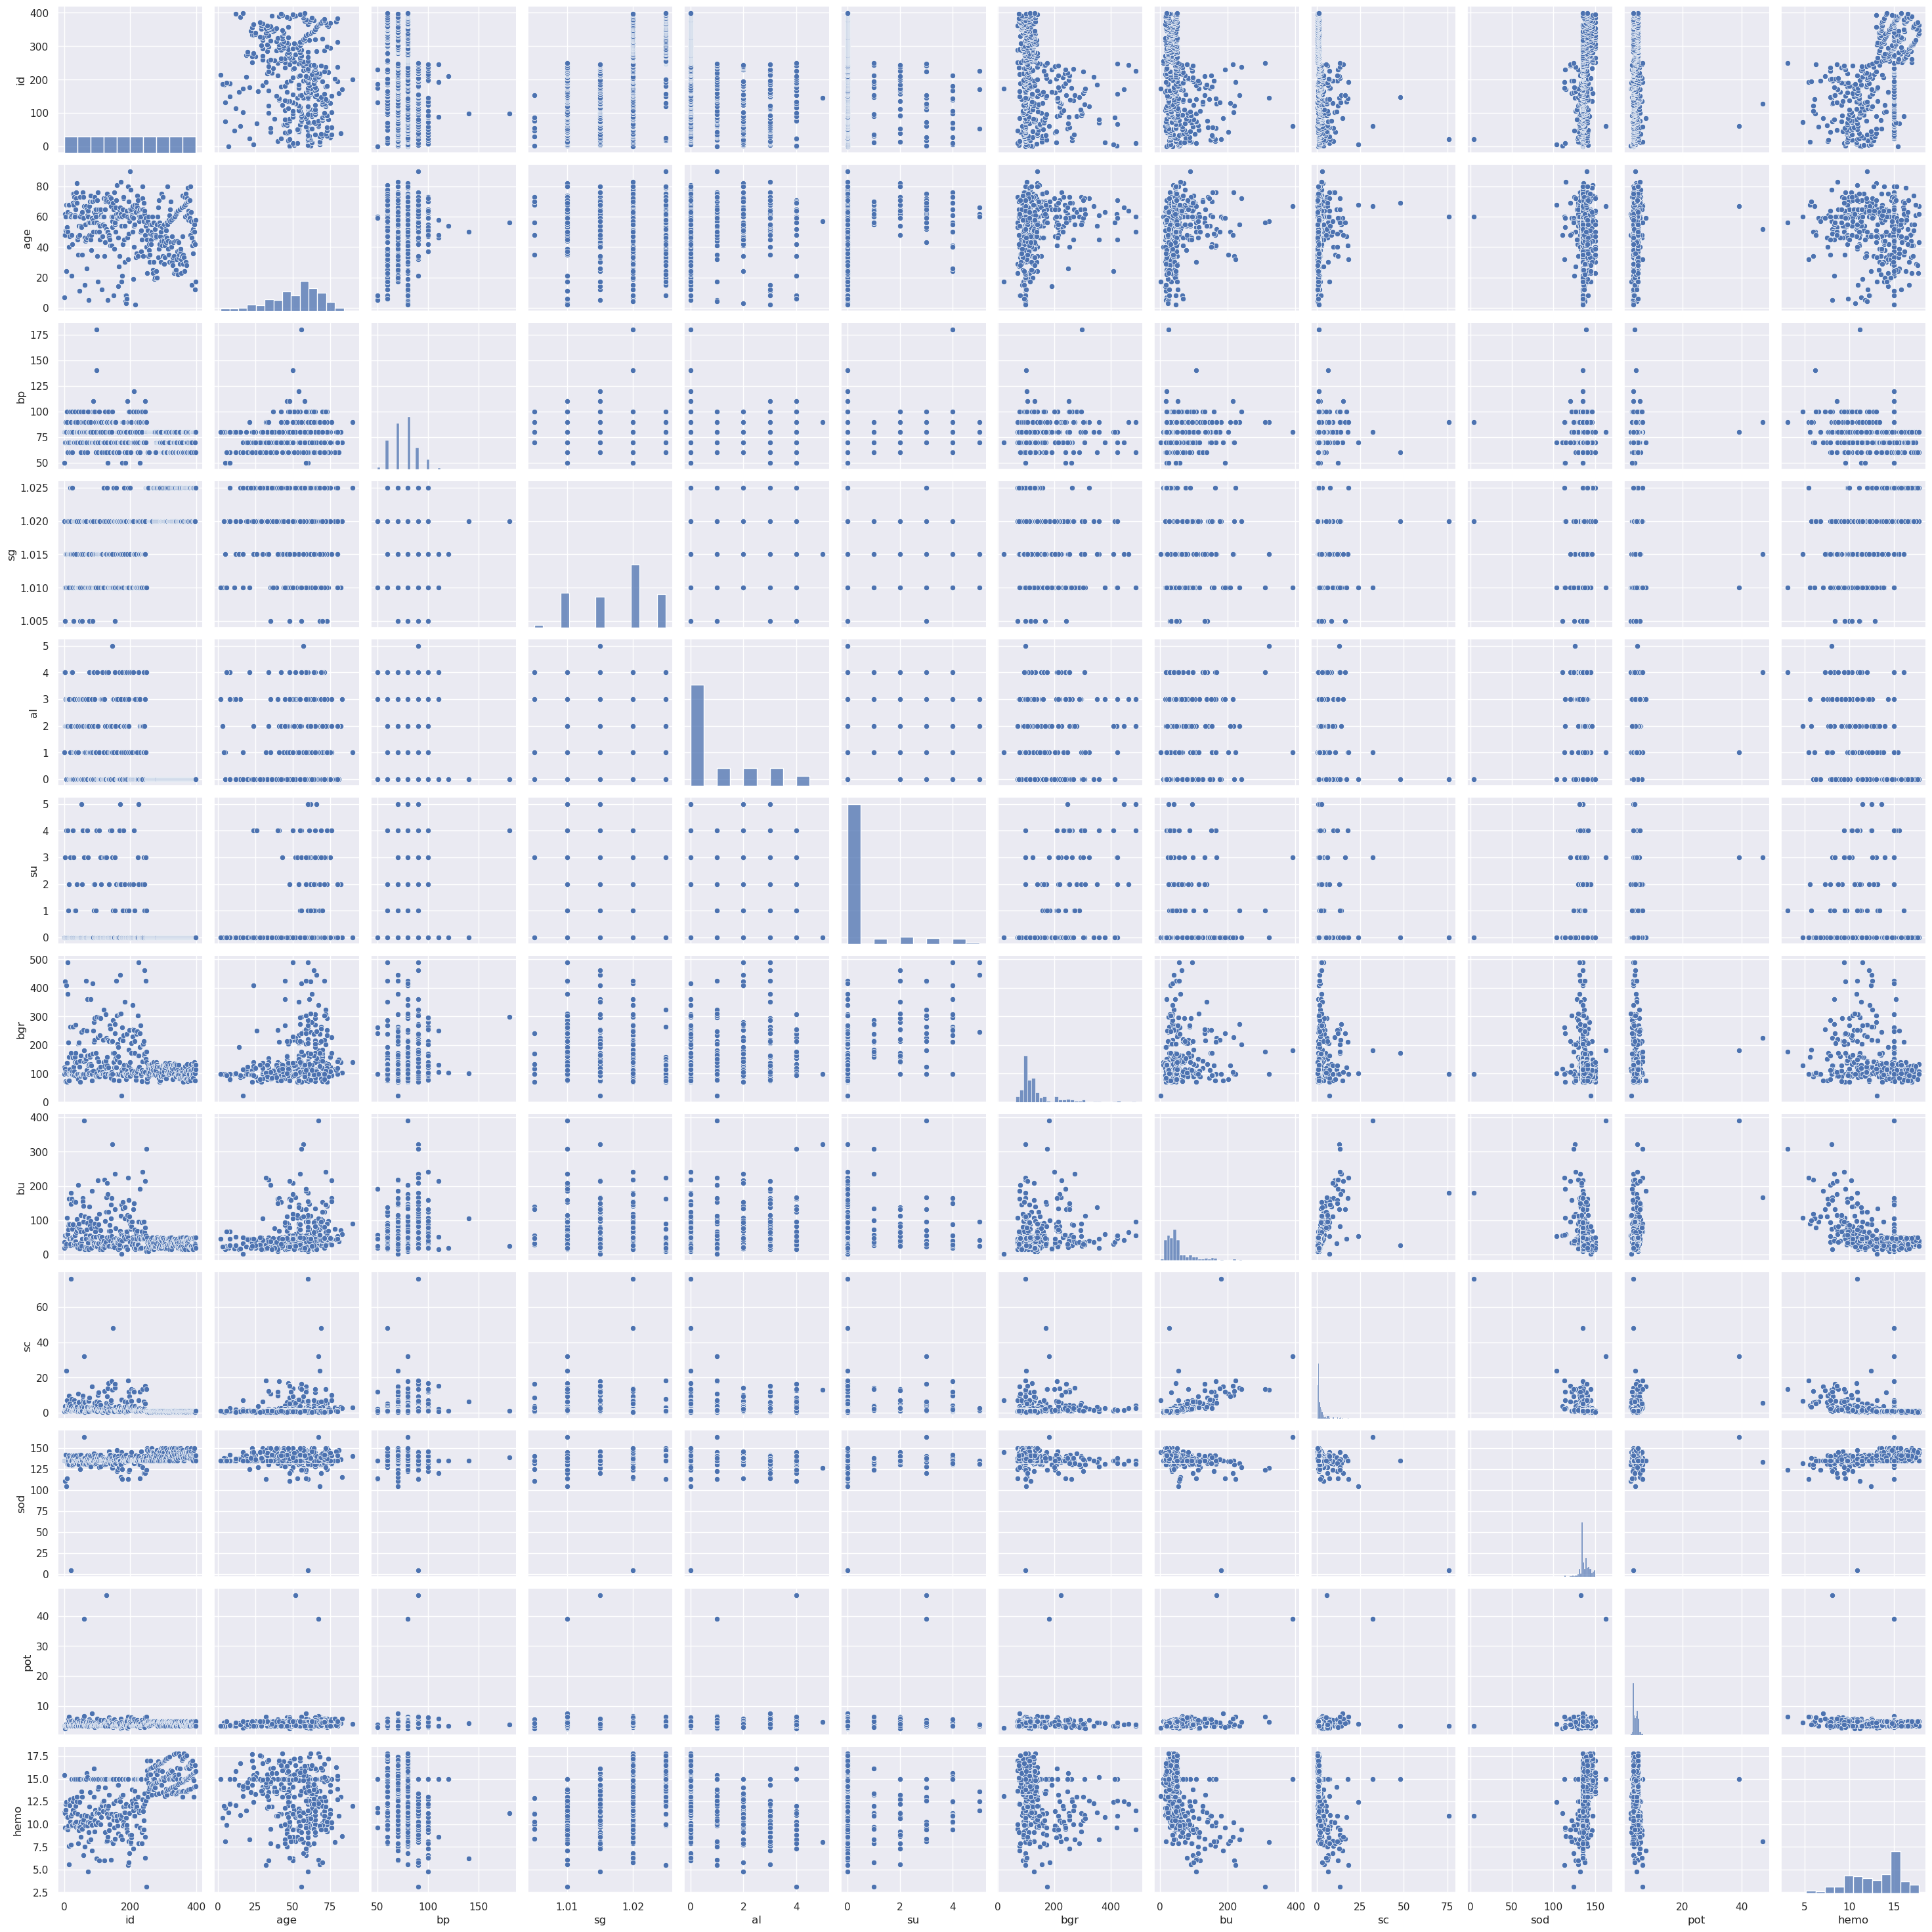

In [20]:
#visulaize - pairplot-relationship b/w every pair of attribute

sns.pairplot(df_imputed)
#scatters- numerical cols, st lines- categorical cols

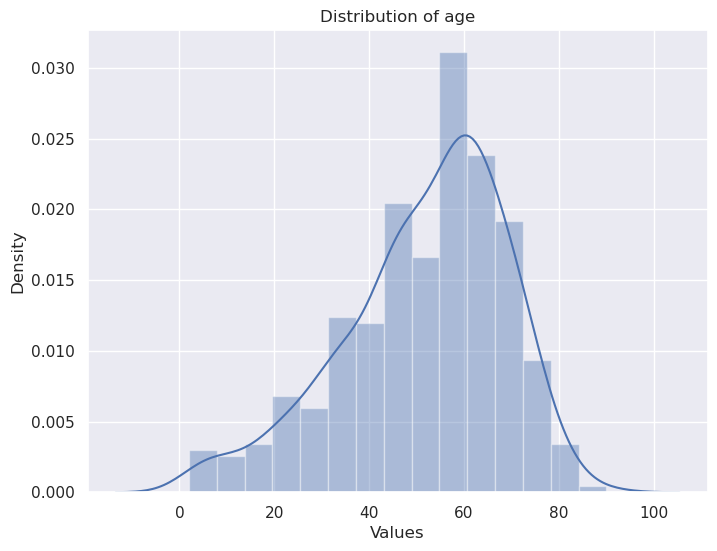

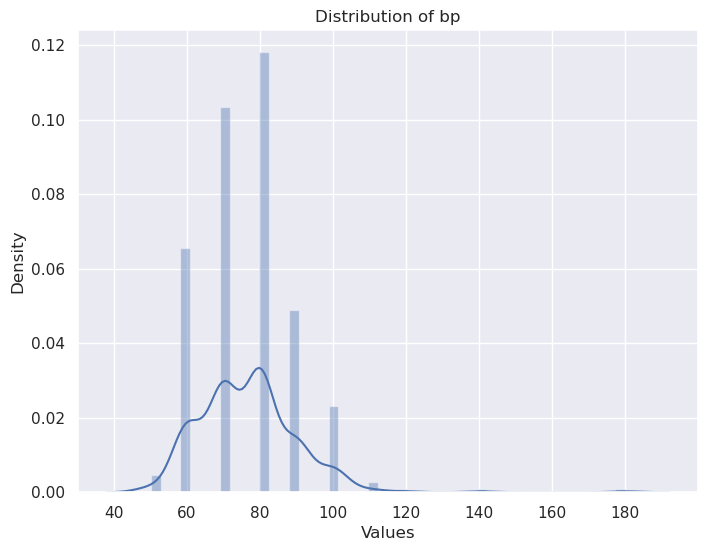

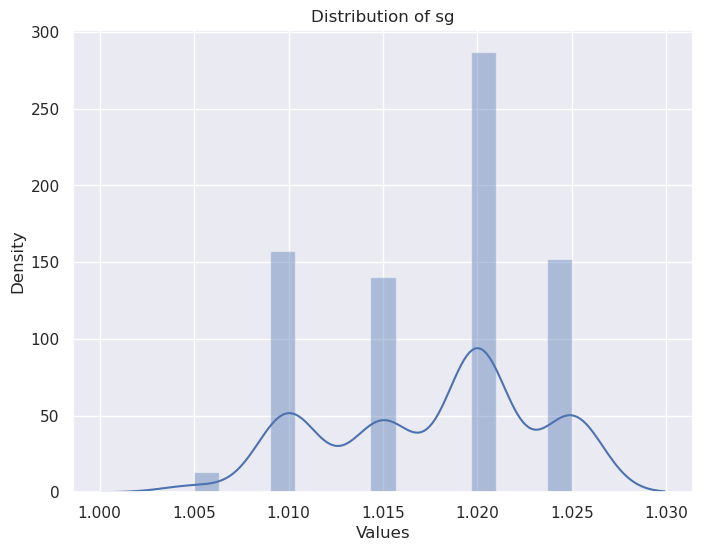

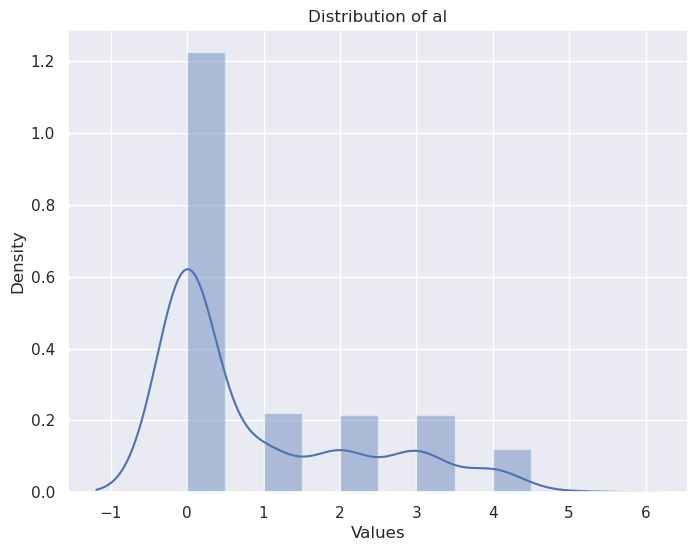

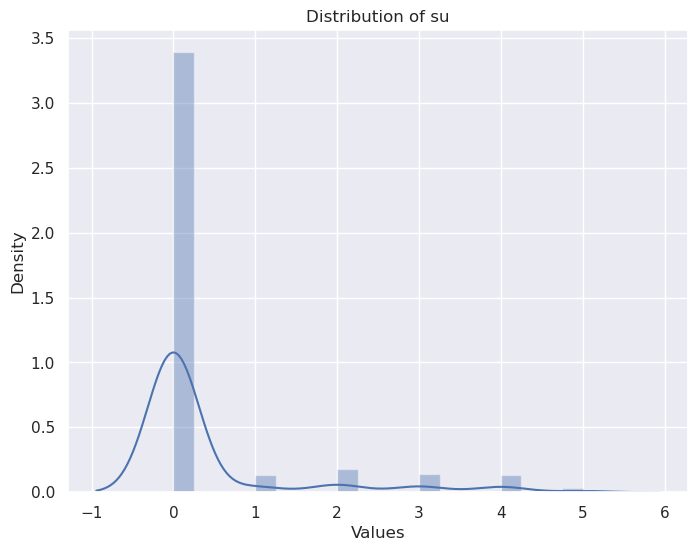

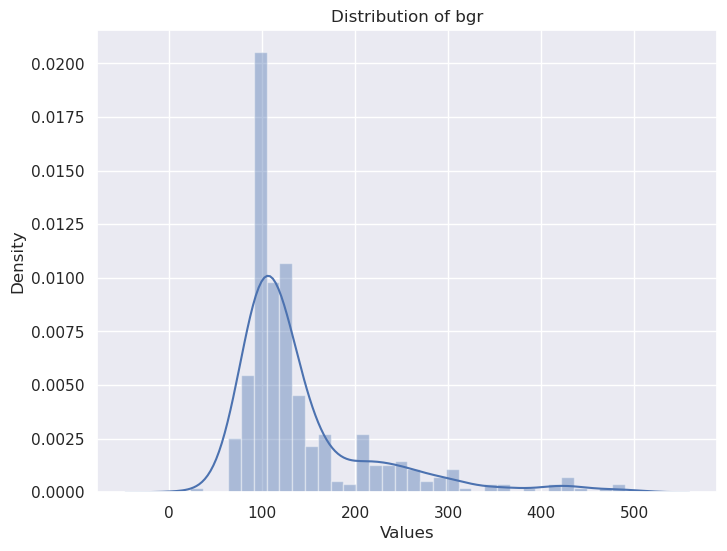

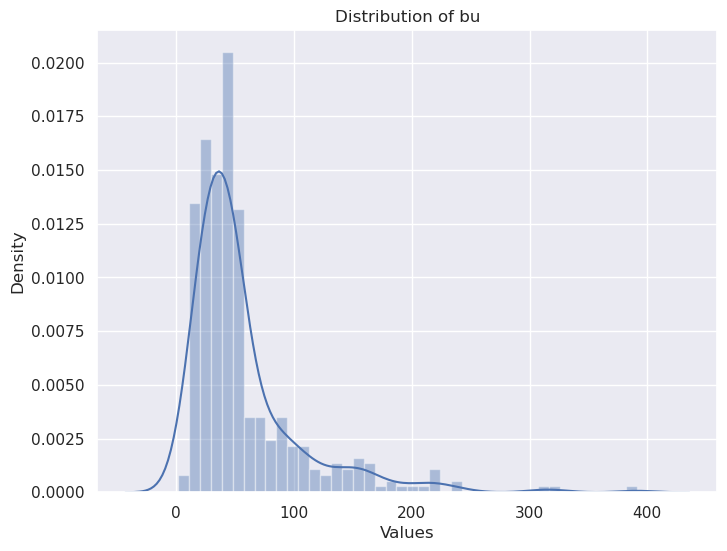

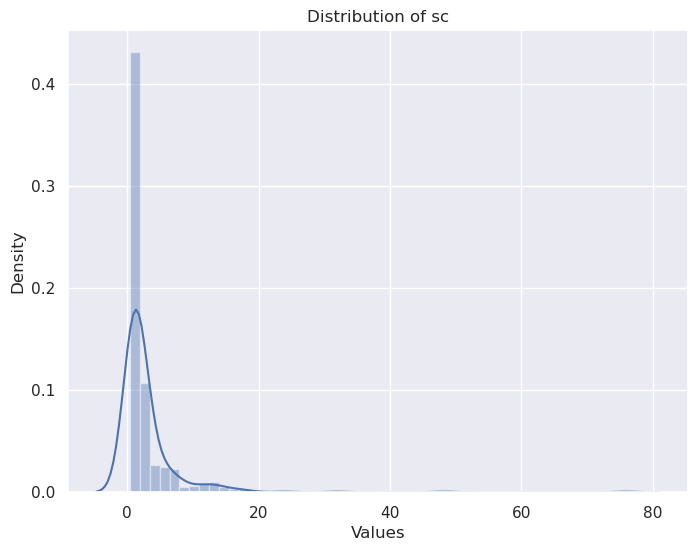

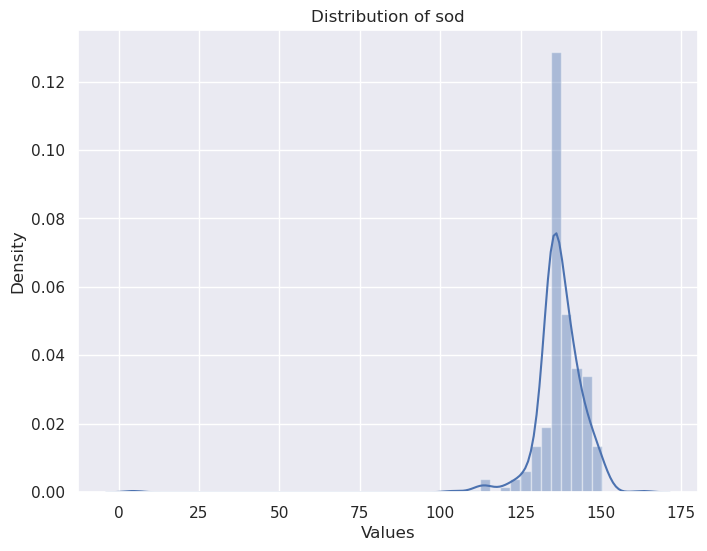

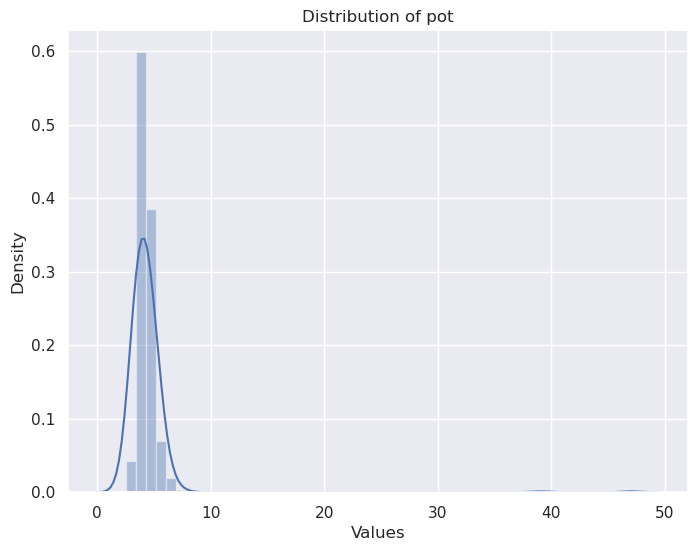

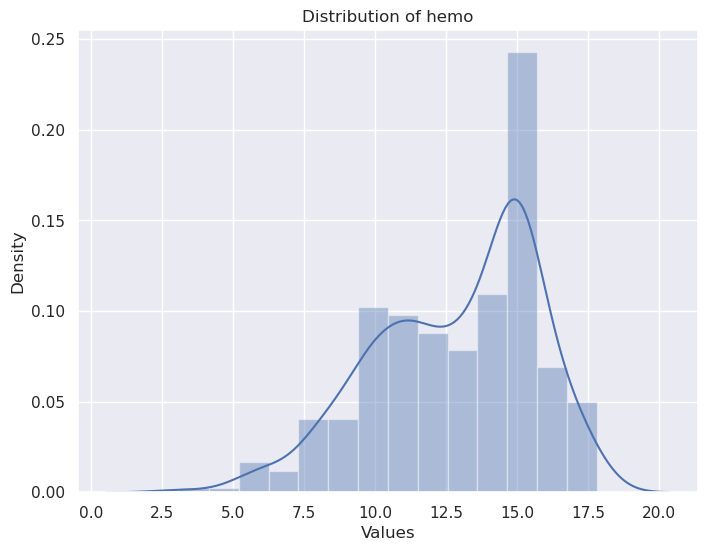

In [21]:
#Find the distribution of data

numerical_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns[1:]
for column in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    
    # Plot the distribution for the current column
    sns.distplot(df_imputed[column])
    
    # Add labels and title
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'Distribution of {column}')
    
    # Show the plot
    plt.show()

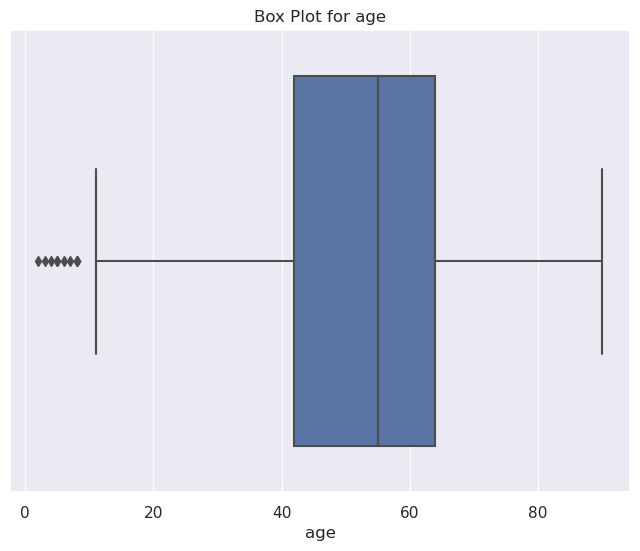

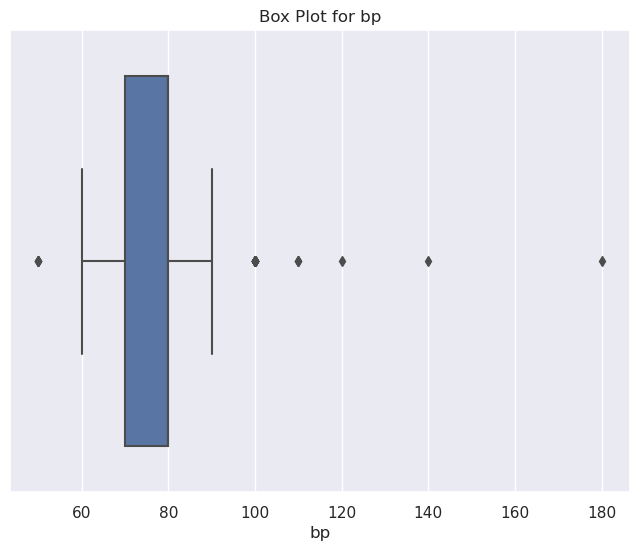

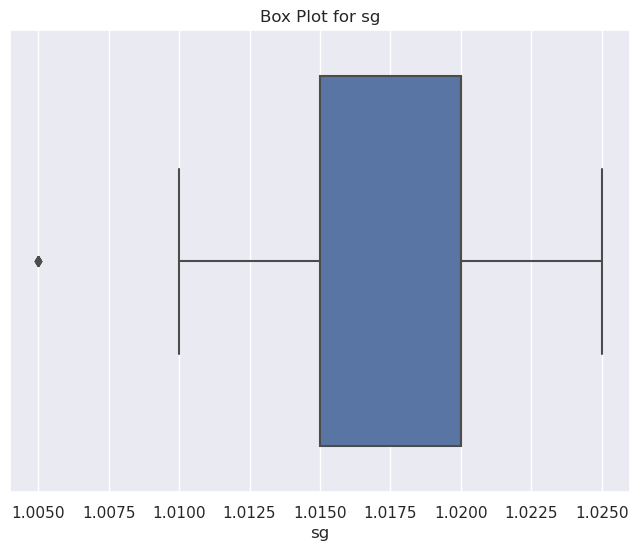

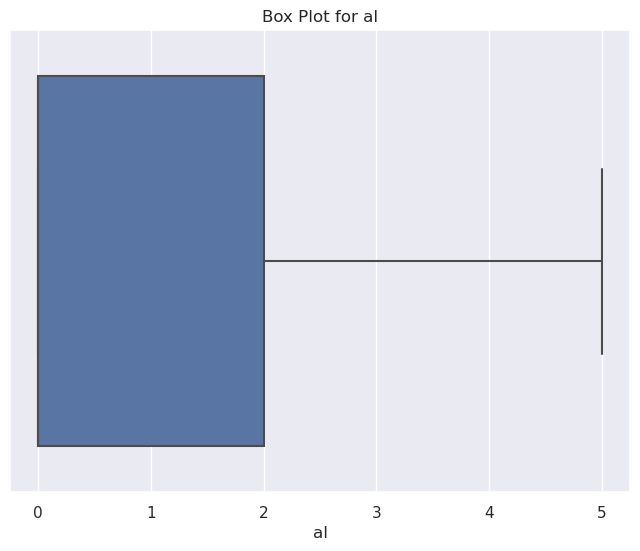

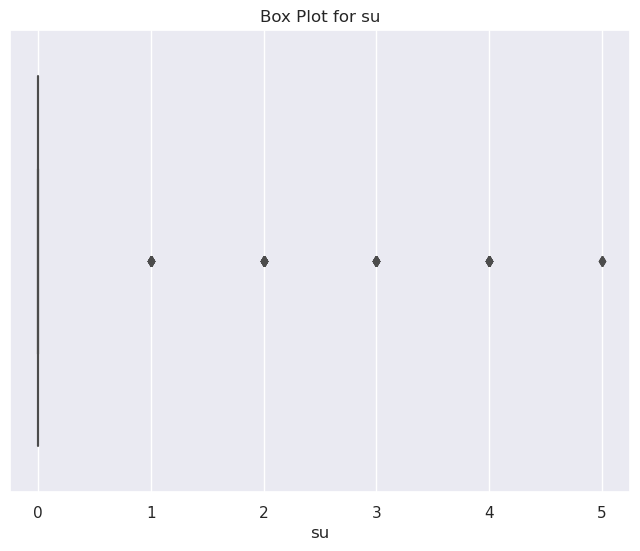

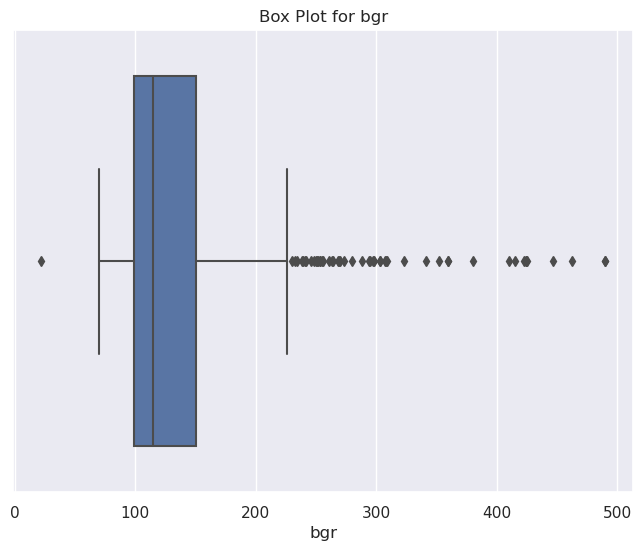

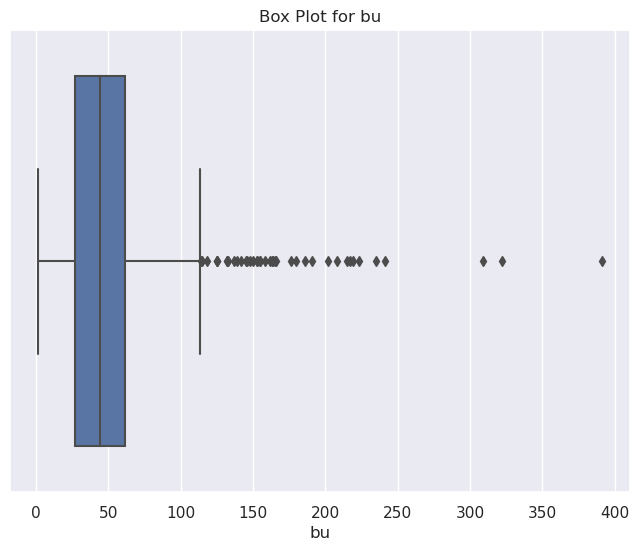

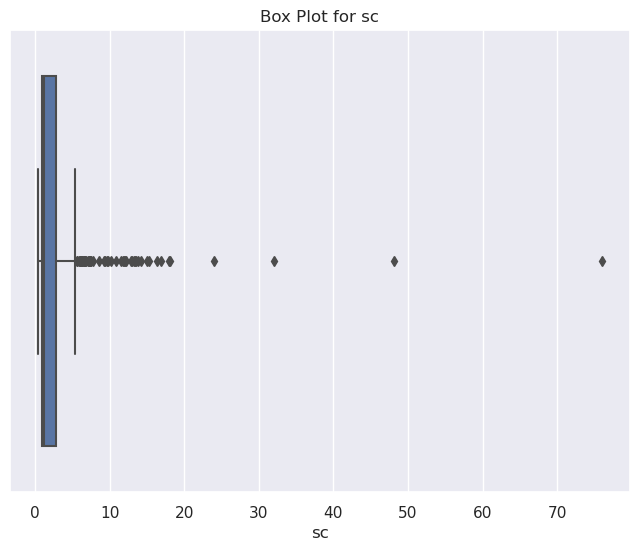

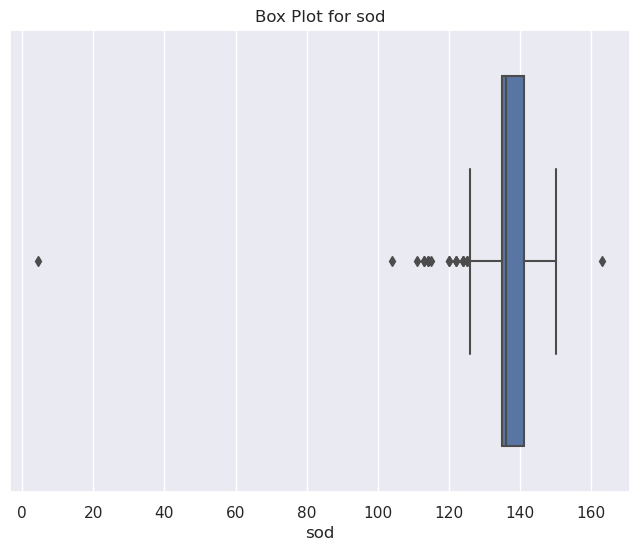

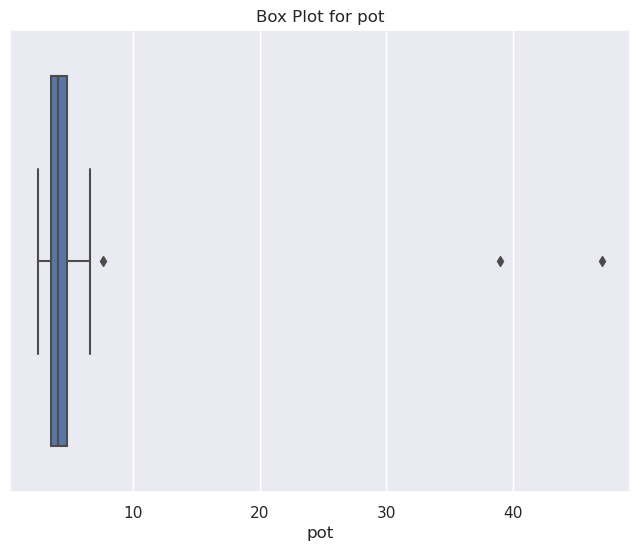

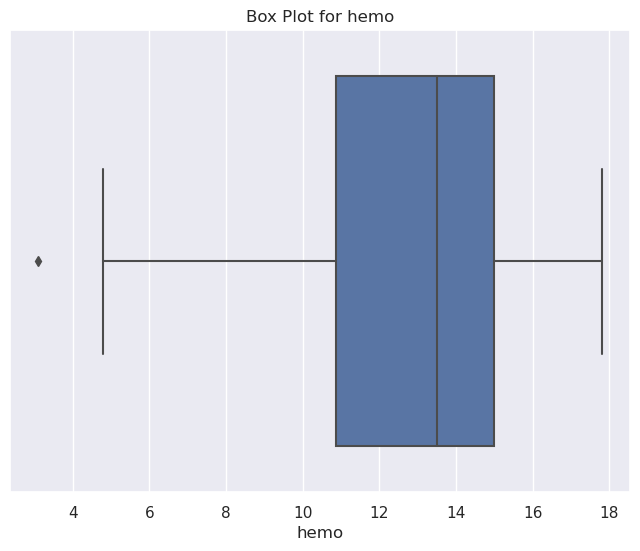

In [22]:
#finding the outliers of the data
for column in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_imputed[column])
    plt.title(f"Box Plot for {column}")
    plt.show()

In [23]:
#encoding the data
from sklearn.preprocessing import LabelEncoder

def encode_categorical_cols(df_imputed, cols):
    le = LabelEncoder()
    for col in cols:
        if col in df_imputed.columns:
            df_imputed[col] = le.fit_transform(df_imputed[col].astype(str))
    return df_imputed

# Assuming 'df_imputed' is the DataFrame with imputed values
categorical_cols = ['rbc','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane','classification']  # Replace with the names of your categorical columns

df_encoded = encode_categorical_cols(df_imputed, categorical_cols)




In [24]:
df_encoded

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [25]:
df_encoded.to_csv("Kidney_Disease_PreProcessed.csv")

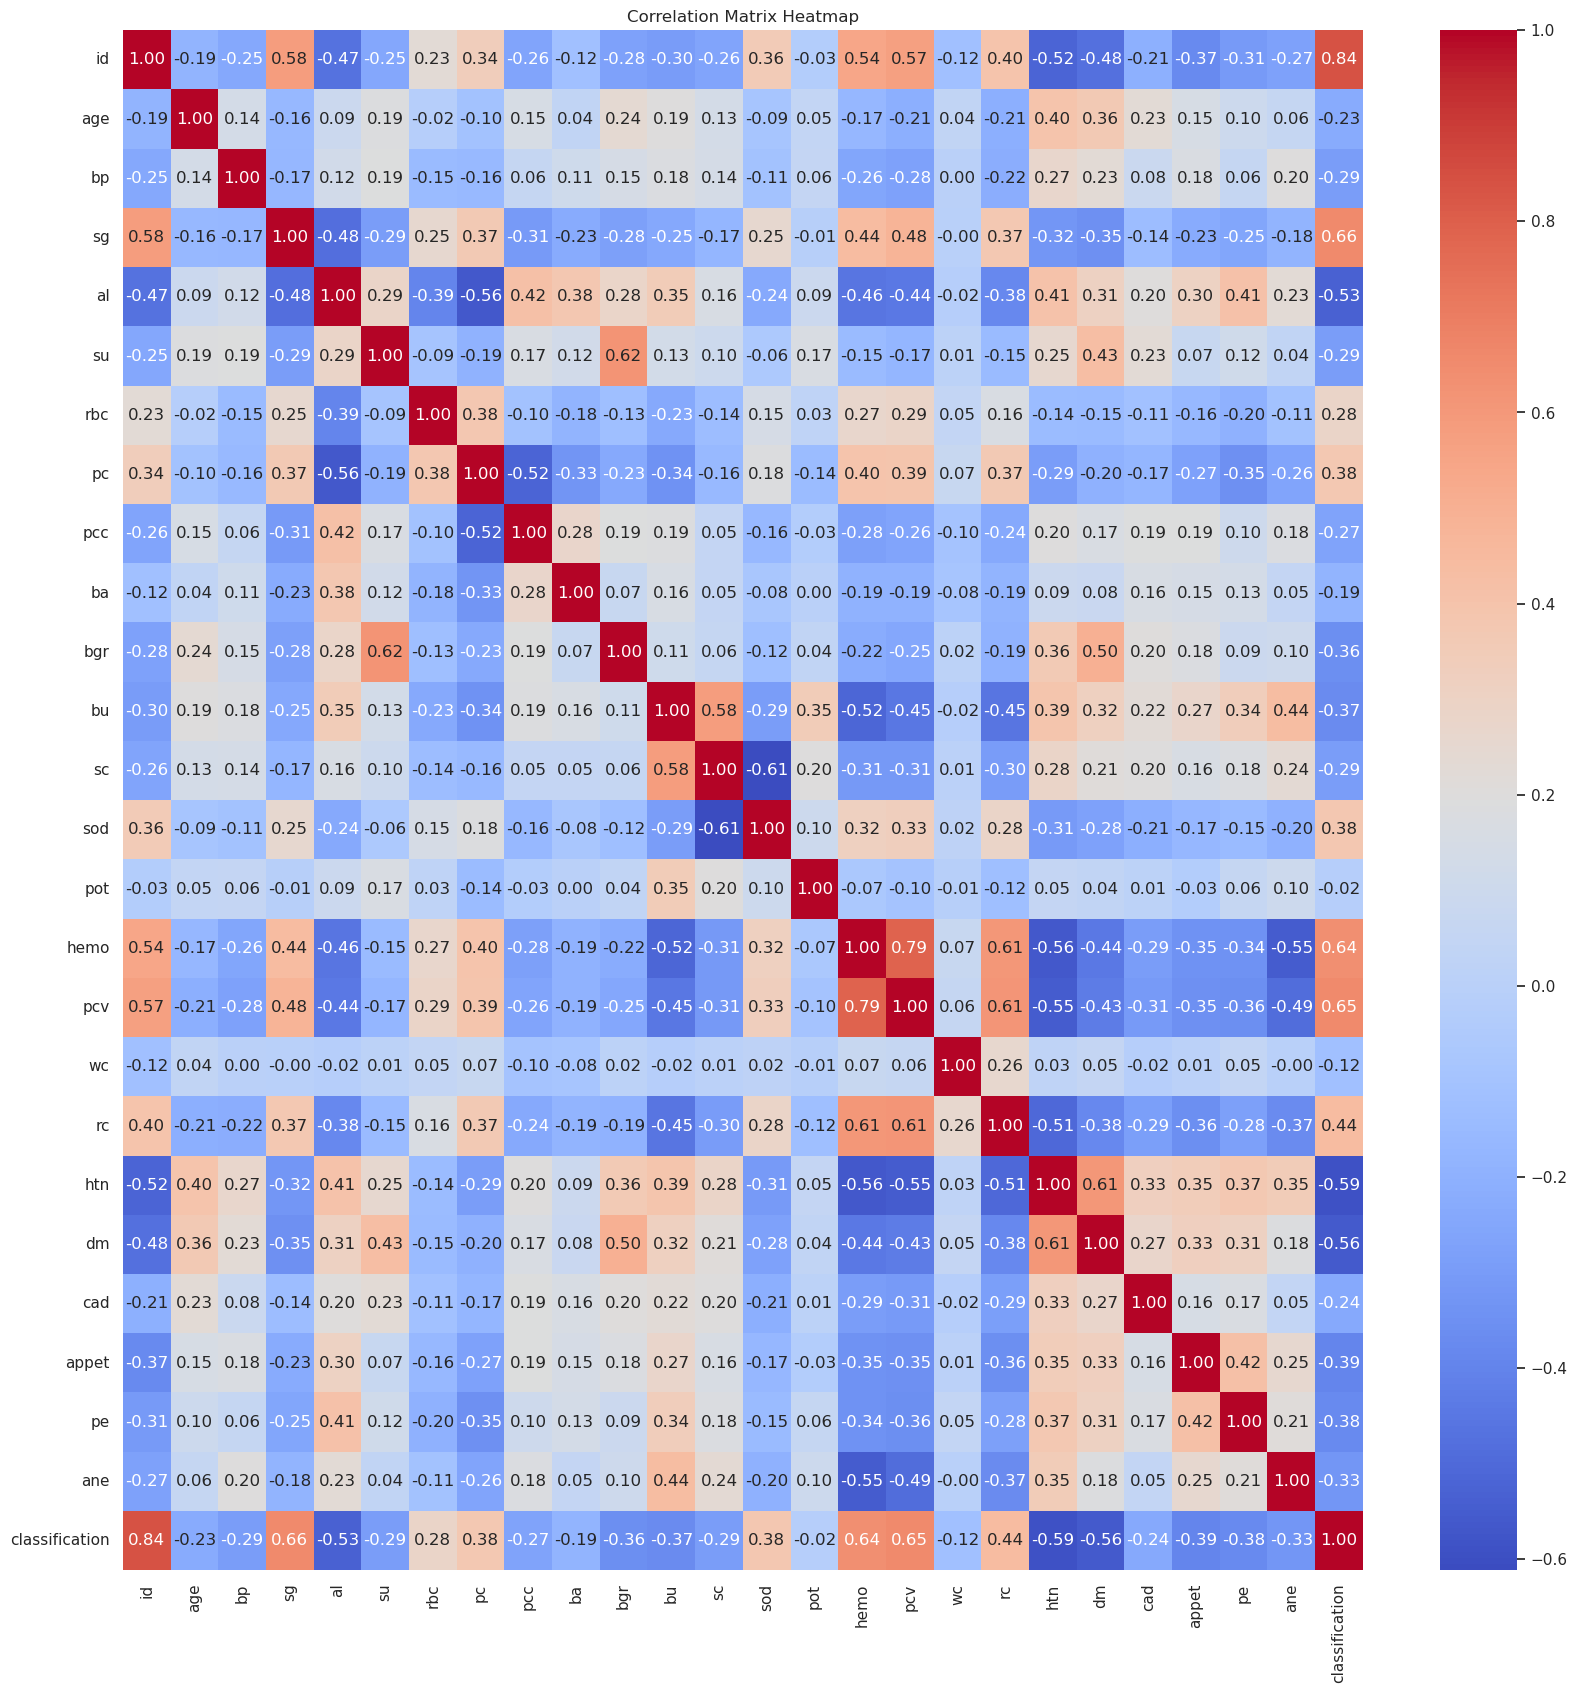

In [26]:
#Since the correlation value is very regulated there is no need to drop any column
correlation_matrix = df_imputed.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [27]:
#separate data into dependent and independent variables
x=df_imputed.drop(['id','classification'], axis=1)
y=df_imputed['classification']

In [28]:
#detect the label balance 
!pip install imbalanced-learn


# This class is used for oversampling the minority class in imbalanced datasets.
# This class is used for undersampling the majority class in imbalanced datasets.
# The Counter class is used to count the occurrences of elements in a list or any other iterable.

In [29]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


print(Counter(y))

Counter({0: 250, 1: 150})


In [30]:
#balancing the masks

ros=RandomOverSampler()

x_ros,y_ros=ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [31]:
#Scaling
scaler=MinMaxScaler((-1,1))   #you can set the range acc to your wish
x=scaler.fit_transform(x_ros)
y=y_ros

#PCA -> Dimensionality Reduction
#when you say you want to preserve 99% of the variance, it means that 
#you want to keep enough of the important patterns in your data.
#Imagine you have a puzzle, and some pieces are way more important
#than others for forming the main picture. You want to make sure you put 
#those important pieces together, they still make up about 99% of the overall picture.


In [32]:
from sklearn.decomposition import PCA

pca=PCA(.95)
x_pca=pca.fit_transform(x)

print(x.shape)
print(x_pca.shape)  
#DImensions reduced to 15 from 24

(500, 24)
(500, 15)


In [33]:
#with PCA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x_pca,y, test_size=0.2, random_state=42)

In [34]:
#NN
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [35]:
def model():
    classifier=Sequential()
    classifier.add(Dense(15,input_shape=(x_train.shape[1],),activation='relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(15,activation='relu'))
    classifier.add(Dropout(0.4))
    #binary hai isliye dense o/p should be 1 [gives 0,1 as o/p]
    classifier.add(Dense(1,activation='sigmoid'))
    classifier.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
    
    return classifier

    

In [36]:
x_train.shape[1]# no of attributes


15

In [37]:
model=model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 496
Trainable params: 496
Non-trainable params: 0
_________________________________________________________________


In [38]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=5, verbose=1)

Epoch 1/5
13/13 [==============================] - 1s 23ms/step - loss: 0.7646 - accuracy: 0.4900 - val_loss: 0.6987 - val_accuracy: 0.6100
Epoch 2/5
13/13 [==============================] - 0s 6ms/step - loss: 0.7297 - accuracy: 0.5300 - val_loss: 0.6737 - val_accuracy: 0.6500
Epoch 3/5
13/13 [==============================] - 0s 6ms/step - loss: 0.6937 - accuracy: 0.5850 - val_loss: 0.6511 - val_accuracy: 0.7000
Epoch 4/5
13/13 [==============================] - 0s 5ms/step - loss: 0.6755 - accuracy: 0.6350 - val_loss: 0.6284 - val_accuracy: 0.7300
Epoch 5/5
13/13 [==============================] - 0s 5ms/step - loss: 0.6457 - accuracy: 0.6875 - val_loss: 0.6047 - val_accuracy: 0.7400


In [39]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [40]:
    
def plot_auc(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob, pos_label=1)
    fig, c_ax = plt.subplots(1, 1, figsize=(9, 9))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

def plot_precision_recall_curve_helper(y_true, y_pred_prob):
    plt.figure(figsize=(10, 6))
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob, pos_label=1)
    aps = average_precision_score(y_true, y_pred_prob)
    plt.plot(recall, precision, label='%s (AP Score:%0.2f)' % ('classification', aps))
    plt.legend()
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()


In [41]:
def plot_history(history):
    f=plt.figure()
    f.set_figwidth(15)
    

    # Plot model loss
    f.add_subplot(1,2,1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.legend()

    # Plot model accuracy
    f.add_subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    plt.show()

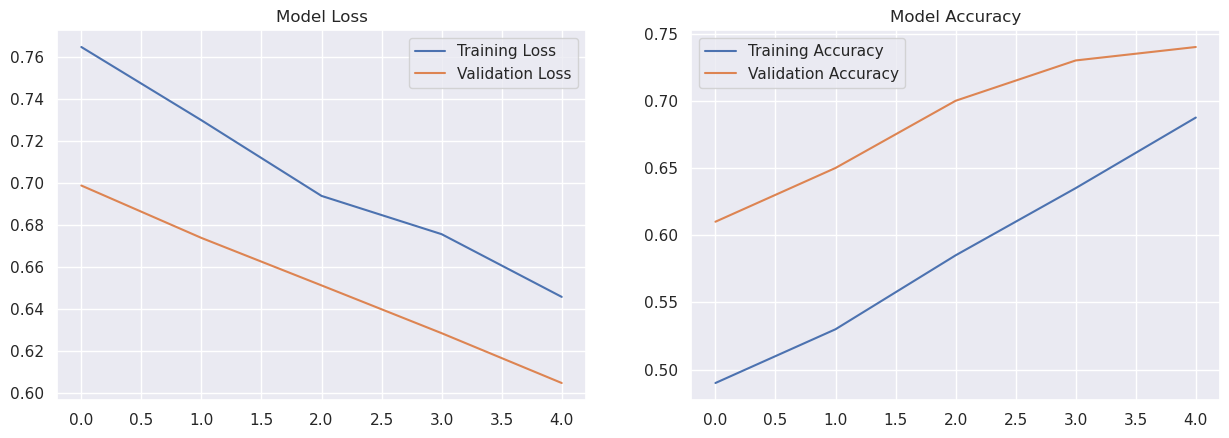

In [42]:
hist=plot_history(history)

4/4 [==============================] - 0s 2ms/step


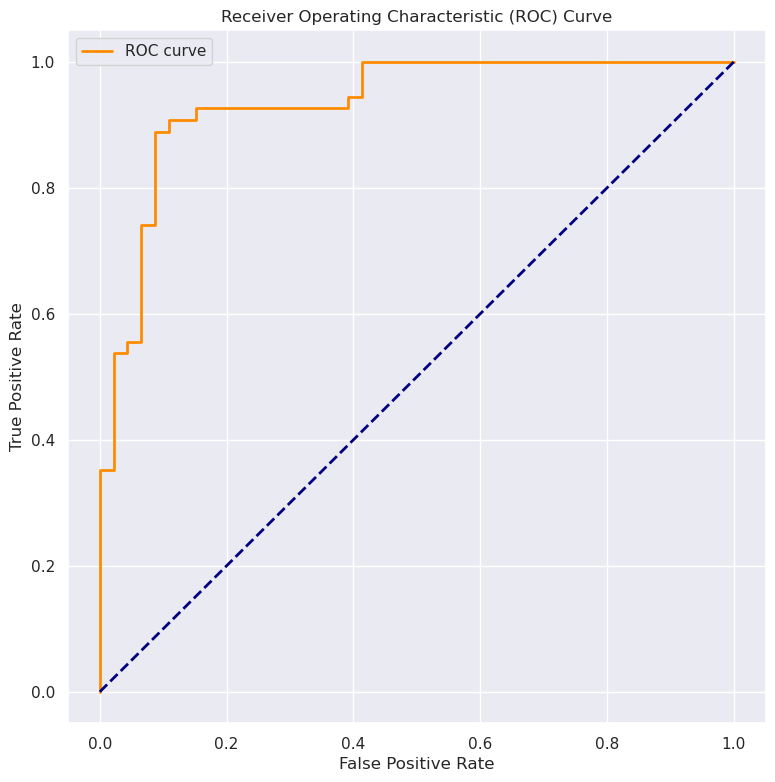

In [43]:
plot_auc(y_test, model.predict(x_test,verbose=True))

4/4 [==============================] - 0s 2ms/step


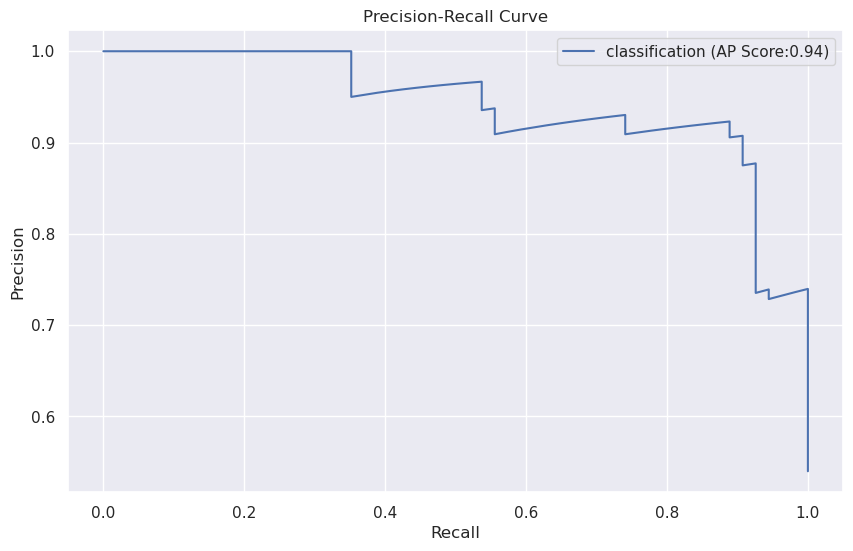

In [44]:
plot_precision_recall_curve_helper(y_test,model.predict(x_test,verbose=True))

In [45]:
# Find the threshold that optimize your model's performance
#use that threshold to make binary classificaion, Make sure you take all your metrics into consideration

In [46]:
from sklearn.metrics import f1_score

# Calculate F1 score

def calc_f1(prec, recall):
    return 2 * (prec * recall) / (prec + recall) if recall and prec else 0

precision, recall, thresholds = precision_recall_curve(y_test, model.predict(x_test, verbose=True))
f1 = [calc_f1(precision[i], recall[i]) for i in range(len(thresholds))]
idx = np.argmax(f1)
threshold = thresholds[idx]

print("F1 Score:", f1[idx])
print("Precision:", precision[idx])
print("Recall:", recall[idx])
print("Threshold:", threshold)

4/4 [==============================] - 0s 2ms/step
F1 Score: 0.9074074074074074
Precision: 0.9074074074074074
Recall: 0.9074074074074074
Threshold: 0.5581591


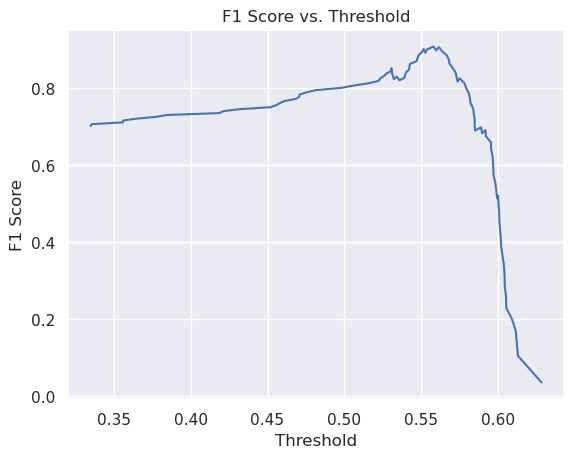

In [47]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(thresholds, f1)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.show()

#beyond 0.606 it starts to dec , coz threshold value is 0.606